In [1]:
from numpy import log, sqrt, pi, exp
from scipy.stats import norm
from datetime import datetime, date
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

In [2]:
def d1(S,K,T,b,r,sigma):
    return(log(S/K)+(b+sigma**2/2.)*T)/(sigma*sqrt(T))

def d2(S,K,T,b,r,sigma):
    return d1(S,K,T,b,r,sigma)-sigma*sqrt(T)

def bs_call(S,K,T,b,r,sigma):
    return S*exp((b-r)*T)*norm.cdf(d1(S,K,T,b,r,sigma))-K*exp(-r*T)*norm.cdf(d2(S,K,T,b,r,sigma))

def bs_put(S,K,T,b,r,sigma):
    return K*exp(-r*T)*norm.cdf(-d2(S,K,T,b,r,sigma))-S*exp((b-r)*T)*norm.cdf(-d1(S,K, T, b, r, sigma))

In [3]:
def dichotomy(left,right,error):
    middle = (left+right)/2
    while abs(func(middle)) > error:
        middle = (left+right)/2
        if func(left) * func(middle) < 0:
            right = middle
        else:
            left = middle
    return middle

In [4]:
P = 30.175
S = 165
K = 135
T = 21/365
b = 0.0053
r = 0.0025
def func(sigma):
    return P - bs_call(S,K,T,b,r,sigma)

In [5]:
dichotomy(0.01,1,0.00001)

0.4198614501953125

In [6]:
df = pd.read_csv('AAPL_Options.csv')
df

,Stock,Expiration,Type,Strike,Last Price
0,AAPL,3/18/2022,Call,135.0,30.175
1,AAPL,3/18/2022,Call,140.0,25.300
2,AAPL,3/18/2022,Call,145.0,20.525
3,AAPL,3/18/2022,Call,150.0,15.850
4,AAPL,3/18/2022,Call,155.0,11.525
5,AAPL,3/18/2022,Call,160.0,7.525
6,AAPL,3/18/2022,Call,165.0,4.225
7,AAPL,3/18/2022,Call,170.0,1.935
8,AAPL,3/18/2022,Call,175.0,0.715
9,AAPL,3/18/2022,Call,180.0,0.260


In [7]:
S = 164.85
T = 21/365
b = 0.0053
r = 0.0025
df['Implied Volatility'] = 0

In [8]:
df.loc[0,'Implied Volatility']

0

In [9]:
for i in range(df.shape[0]):
    P = df['Last Price'][i]
    K = df['Strike'][i]
    if df['Type'][i] == 'Call':
        def func(sigma):
            return P - bs_call(S,K,T,b,r,sigma)
        df.loc[i,'Implied Volatility'] = dichotomy(0.01,1,0.00001)
    elif df['Type'][i] == 'Put':
        def func(sigma):
            return P - bs_put(S,K,T,b,r,sigma)
        df.loc[i,'Implied Volatility'] = dichotomy(0.01,1,0.00001)

In [10]:
df

,Stock,Expiration,Type,Strike,Last Price,Implied Volatility
0,AAPL,3/18/2022,Call,135.0,30.175,0.477756
1,AAPL,3/18/2022,Call,140.0,25.300,0.436735
2,AAPL,3/18/2022,Call,145.0,20.525,0.401447
3,AAPL,3/18/2022,Call,150.0,15.850,0.361776
4,AAPL,3/18/2022,Call,155.0,11.525,0.335097
5,AAPL,3/18/2022,Call,160.0,7.525,0.300690
6,AAPL,3/18/2022,Call,165.0,4.225,0.270904
7,AAPL,3/18/2022,Call,170.0,1.935,0.248168
8,AAPL,3/18/2022,Call,175.0,0.715,0.234682
9,AAPL,3/18/2022,Call,180.0,0.260,0.236805


Text(0, 0.5, 'Implied Volatility')

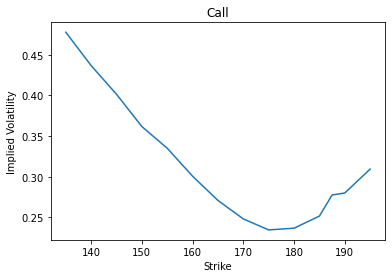

In [15]:
df_call = df[df['Type']=='Call']
plt.plot(df_call['Strike'],df_call['Implied Volatility'])
plt.title('Call')
plt.xlabel('Strike')
plt.ylabel('Implied Volatility')

Text(0, 0.5, 'Implied Volatility')

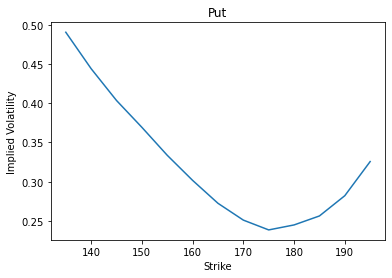

In [16]:
df_put = df[df['Type']=='Put']
plt.plot(df_put['Strike'],df_put['Implied Volatility'])
plt.title('Put')
plt.xlabel('Strike')
plt.ylabel('Implied Volatility')